In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [3]:
con = duckdb.connect(database="data/trusted/db_hospitals.db", read_only=True)
df = con.execute("SELECT * FROM hospitals").fetchdf()
con.close

<bound method PyCapsule.close of <duckdb.DuckDBPyConnection object at 0x7f38813ba830>>

In [4]:
df.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,BEDS,TRAUMA,HELIPAD,ZIP4
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,(281) 420-8765,...,2017-12-18,http://www.houstonmethodist.org/locations/san-...,unknow,unknow,48.0,NON-PROFIT,182.0,unknow,Y,NaN
1,-101.294085,48.232226,8504,5258701,TRINITY HOSPITALS,1 W BURDICK EXPY,MINOT,ND,58701,(701) 857-5000,...,2017-10-02,http://www.trinityhealth.org,5055A,unknow,38.0,NON-PROFIT,251.0,LEVEL II,Y,NaN
2,-80.231076,36.418068,8505,10527016,LIFEBRITE COMMUNITY HOSPITAL OF STOKES,1570 NC 8 & 89 HWY NORTH,DANBURY,NC,27016,(336) 593-2831,...,2017-11-09,http://lifebritestokes.com/,unknow,PIONEER COMMUNITY HOSPITAL OF STOKES,37.0,PROPRIETARY,93.0,unknow,unknow,NaN
3,-95.440687,30.014288,8506,77677090,PROVIDENCE HOSPITAL OF NORTH HOUSTON LLC,16750 RED OAK DR,HOUSTON,TX,77090,(281) 453-7110,...,2017-12-18,http://phnh.net/,unknow,unknow,48.0,PROPRIETARY,16.0,unknow,unknow,NaN
4,-98.225730,26.186992,8507,78178503,MCCALLEN MEDICAL CENTER,301 WEST EXPRESSWAY 83,MCALLEN,TX,78503,(956) 632-4000,...,2017-12-18,http://www.mcallenmedicalcenter.com/,unknow,unknow,48.0,PROPRIETARY,441.0,LEVEL III,Y,NaN


In [5]:
numeric_description(df)

,mean,std,min,25%,50%,75%,max,missings,missing ratio (%)
X,-9.238742e+01,1.599513e+01,-176.640263,-9.819983e+01,-9.007414e+01,-8.176996e+01,1.457245e+02,0.0,0.00
Y,3.733174e+01,5.774908e+00,-14.290242,3.346392e+01,3.797691e+01,4.132251e+01,7.129285e+01,0.0,0.00
OBJECTID,1.128791e+04,2.189654e+03,7497.000000,9.392000e+03,1.128800e+04,1.318400e+04,1.508100e+04,0.0,0.00
ID,2.520163e+07,3.899253e+07,4.000000,3.973134e+06,9.640840e+06,2.241636e+07,1.676842e+08,0.0,0.00
ZIP,5.360992e+04,2.751786e+04,605.000000,3.202600e+04,5.496600e+04,7.680400e+04,9.992900e+04,0.0,0.00
POPULATION,1.468350e+02,1.766724e+02,2.000000,3.000000e+01,7.900000e+01,1.960000e+02,1.592000e+03,1380.0,9.11
LATITUDE,3.733174e+01,5.774908e+00,-14.290242,3.346392e+01,3.797691e+01,4.132251e+01,7.129285e+01,0.0,0.00
LONGITUDE,-9.238742e+01,1.599513e+01,-176.640263,-9.819983e+01,-9.007414e+01,-8.176996e+01,1.457245e+02,0.0,0.00
NAICS_CODE,6.221410e+05,6.610541e+01,622110.000000,6.221100e+05,6.221100e+05,6.221100e+05,6.223100e+05,0.0,0.00
ST_FIPS,2.947219e+01,1.630370e+01,1.000000,1.700000e+01,2.900000e+01,4.400000e+01,7.800000e+01,2.0,0.01


In [6]:
description_categorical(df)

,,#Levels,"Max Freq (Abs,%)","Min Freq (Abs,%)",#Unknows,Unknows (%)
0,NAME,7296,"MEMORIAL HOSPITAL (24, 0.16)",88TH MEDICAL GROUP - WRIGHT-PATTERSON AIR FORC...,0,0.00
1,ADDRESS,7435,"100 HOSPITAL DRIVE (16, 0.11)","0310 COUNTY RD 14 (2, 0.01)",0,0.00
2,CITY,3372,"HOUSTON (140, 0.92)","ABINGTON (2, 0.01)",0,0.00
3,STATE,57,"TX (1596, 10.54)","AS (2, 0.01)",0,0.00
4,TELEPHONE,6262,"unknow (2168, 14.32)","(201) 221-2358 (2, 0.01)",2168,14.32
5,TYPE,10,"GENERAL ACUTE CARE (9022, 59.59)","CHRONIC DISEASE (18, 0.12)",0,0.00
6,STATUS,2,"OPEN (14432, 95.32)","CLOSED (708, 4.68)",0,0.00
7,COUNTY,1602,"LOS ANGELES (262, 1.73)","ABBEVILLE (2, 0.01)",14,0.09
8,COUNTYFIPS,2583,"6037 (262, 1.73)","1001 (2, 0.01)",14,0.09
9,COUNTRY,7,"USA (14976, 98.92)","ASM (2, 0.01)",0,0.00


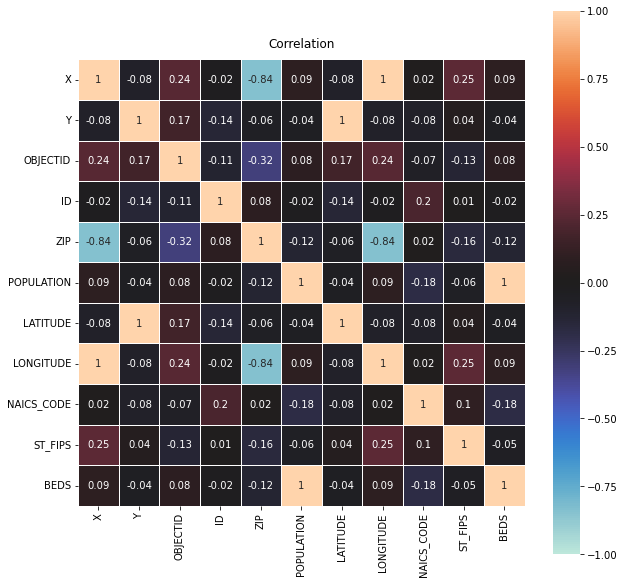

In [7]:
correlation(df)

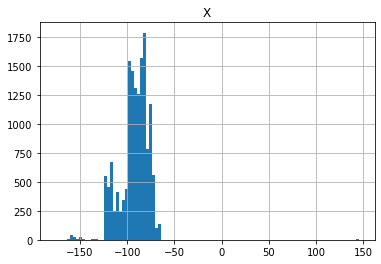

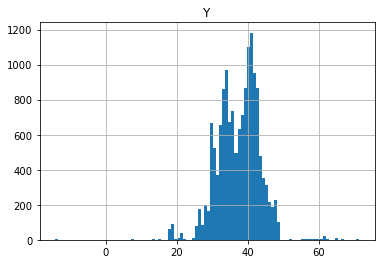

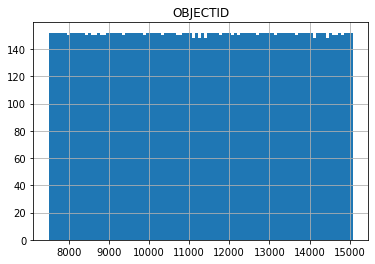

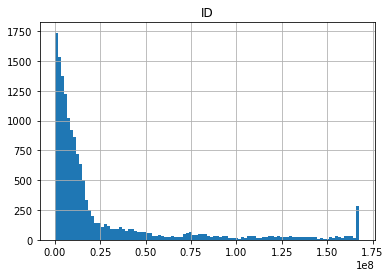

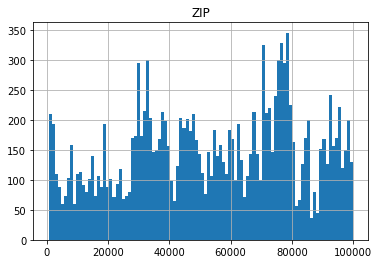

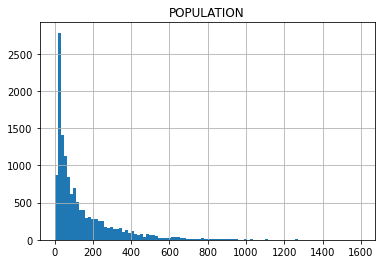

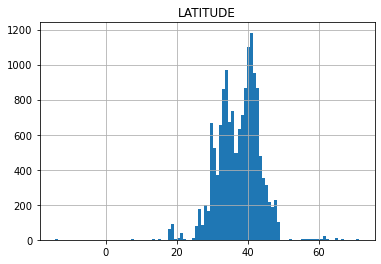

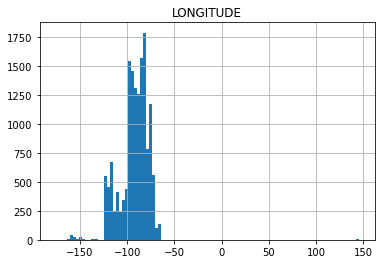

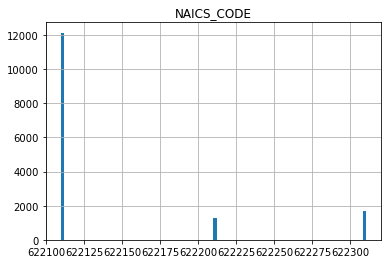

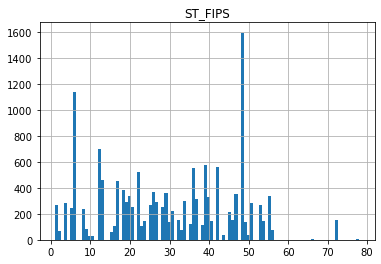

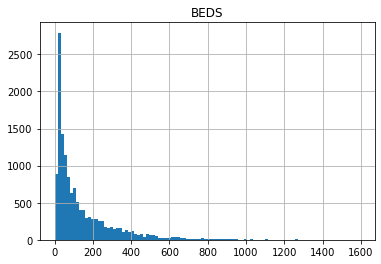

In [8]:
hist(df, bins=100)

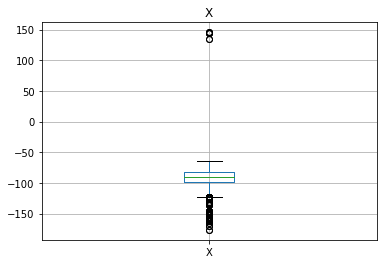

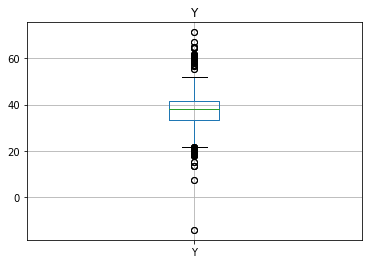

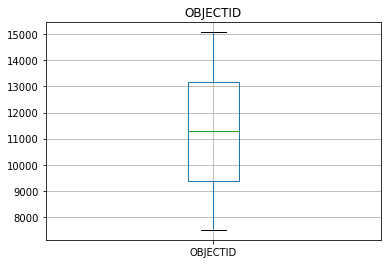

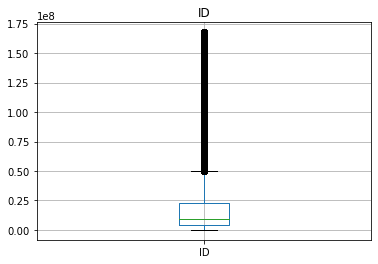

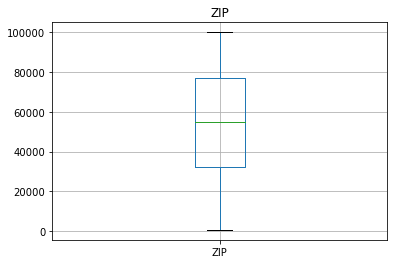

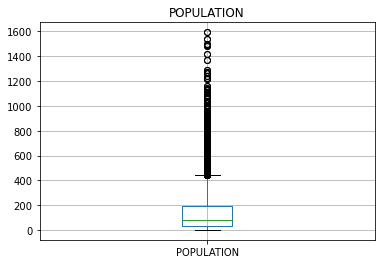

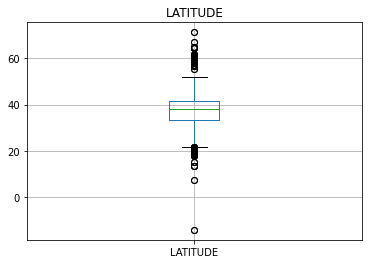

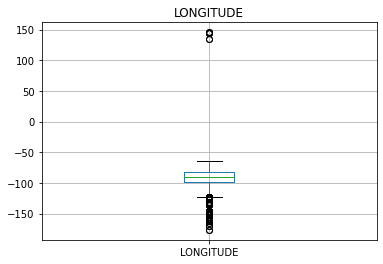

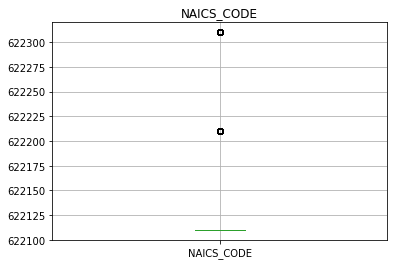

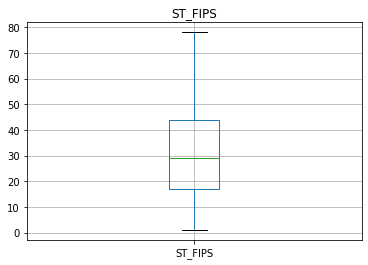

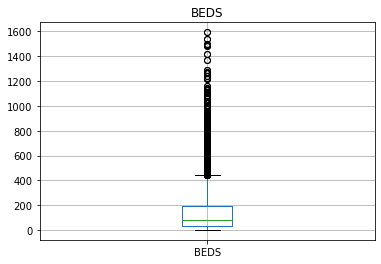

In [9]:
boxplot(df)

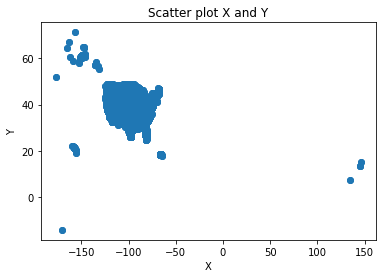

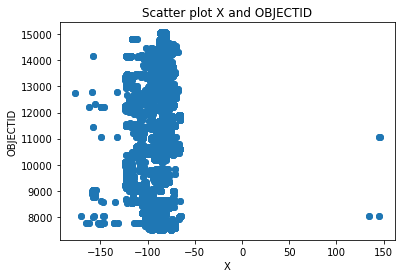

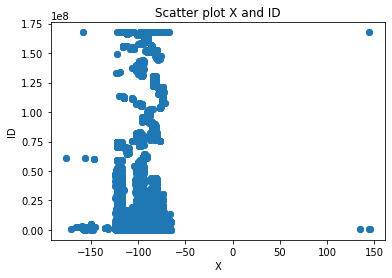

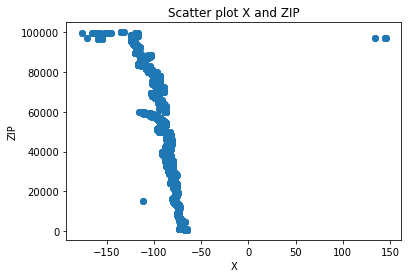

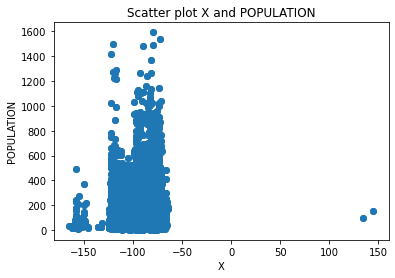

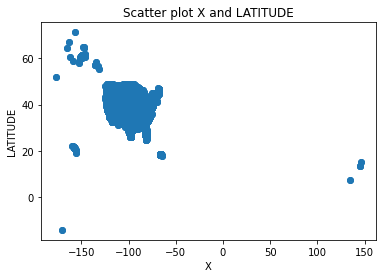

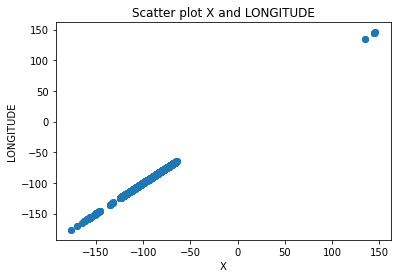

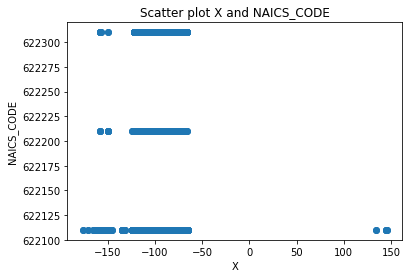

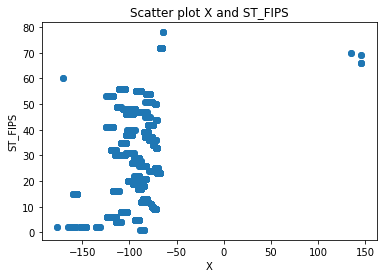

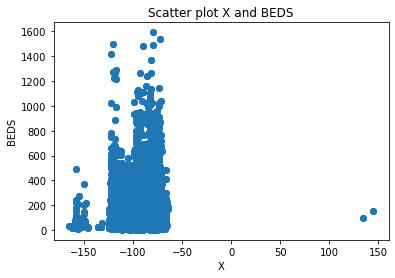

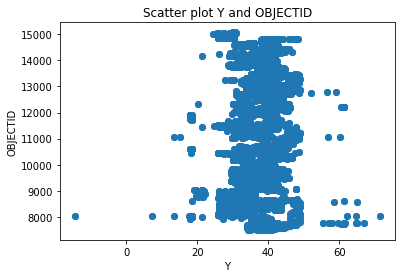

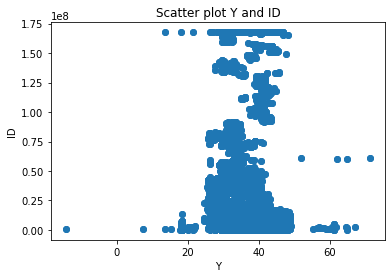

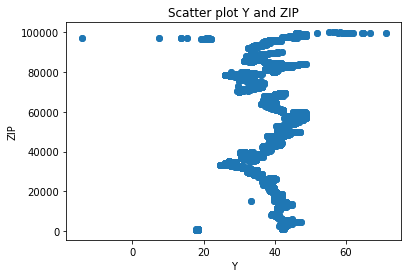

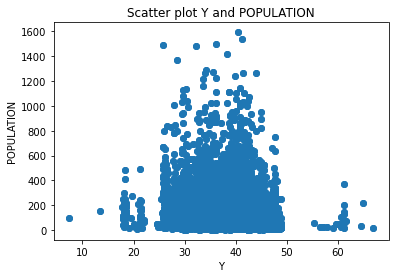

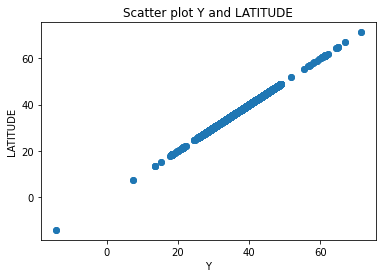

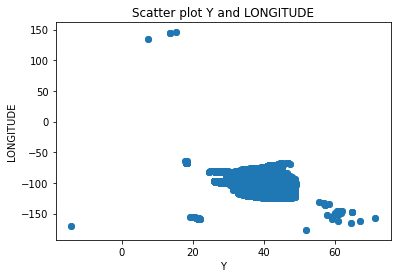

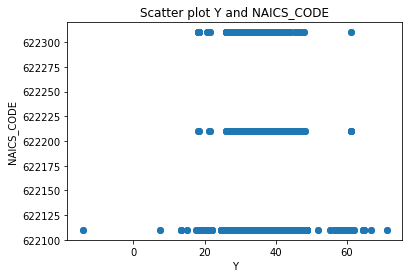

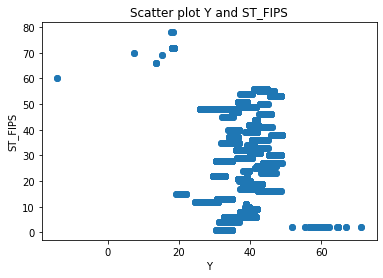

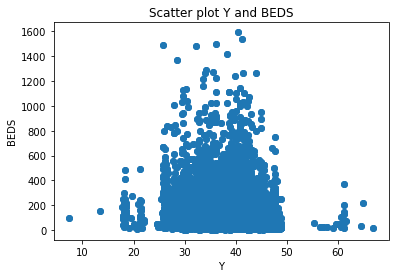

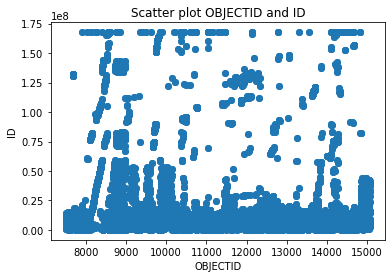

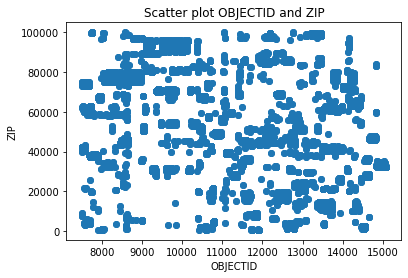

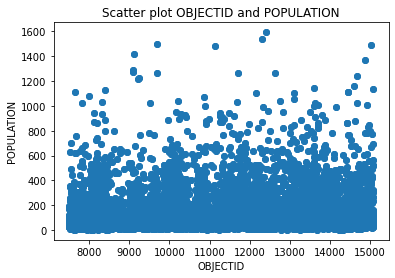

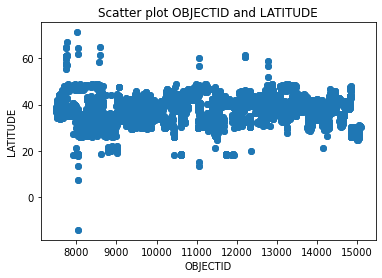

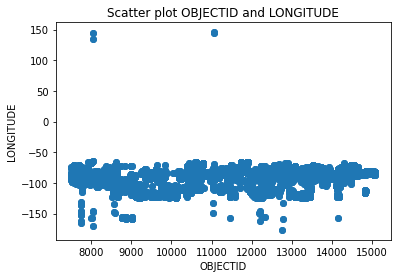

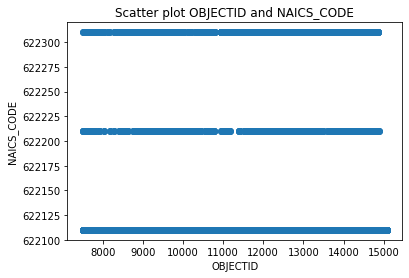

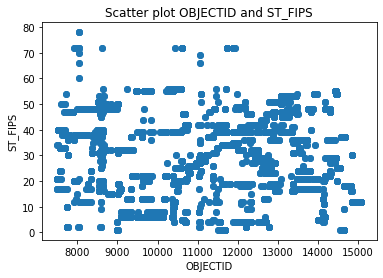

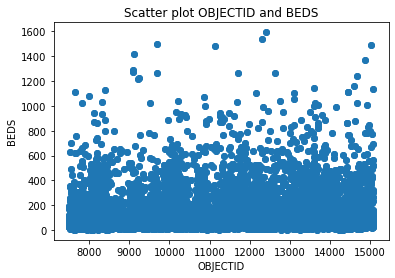

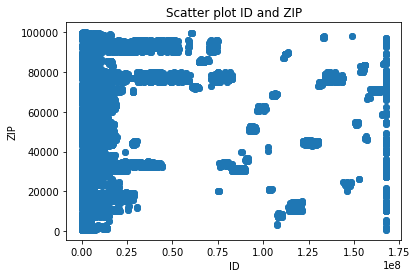

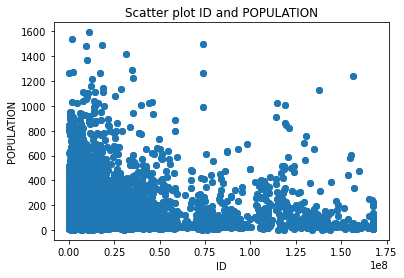

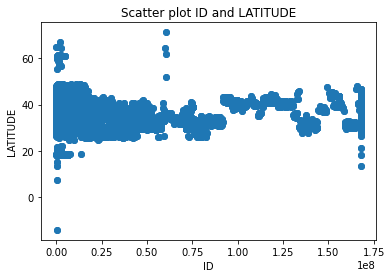

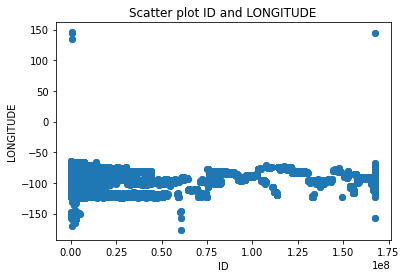

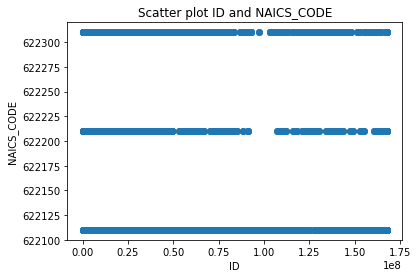

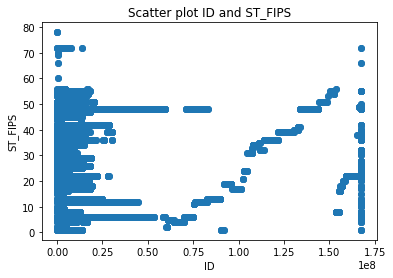

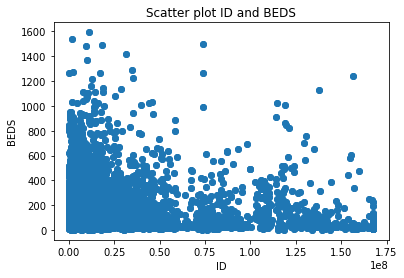

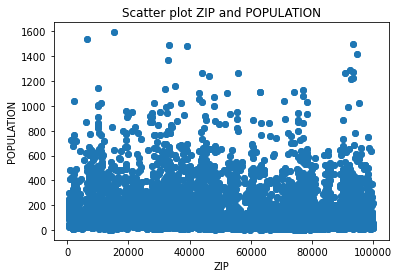

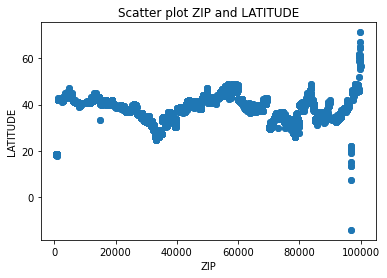

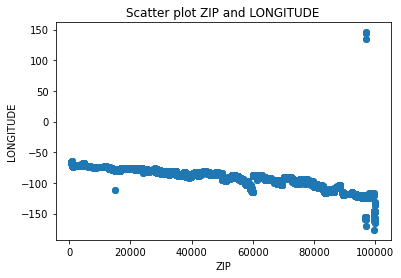

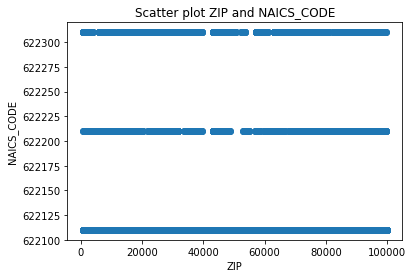

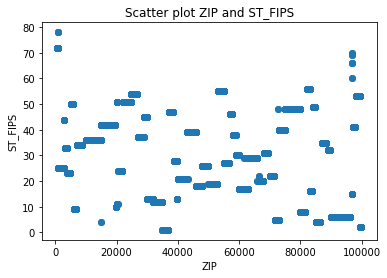

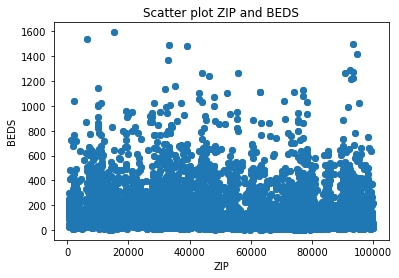

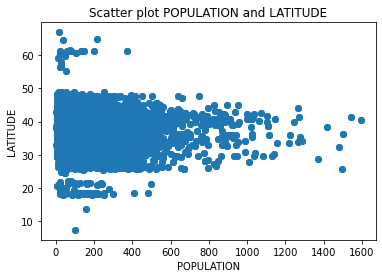

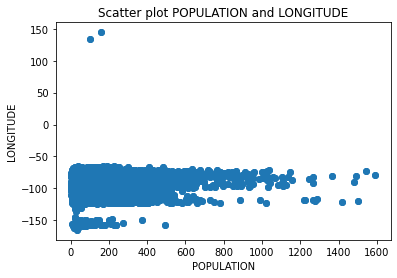

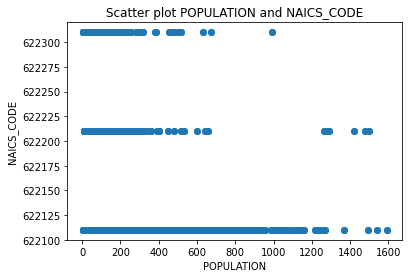

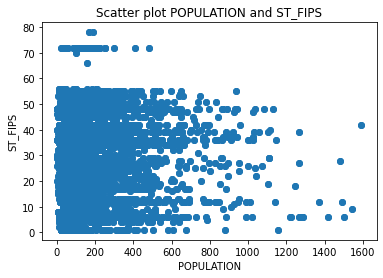

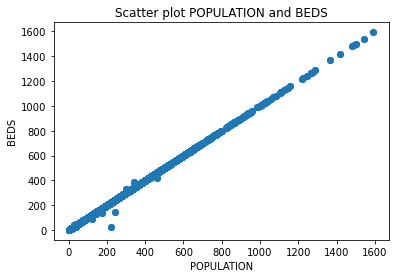

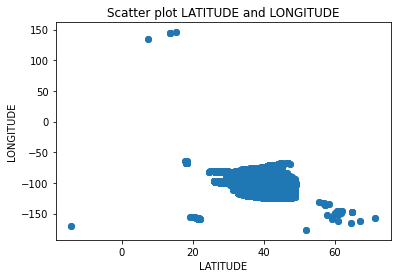

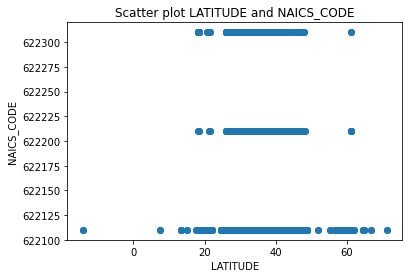

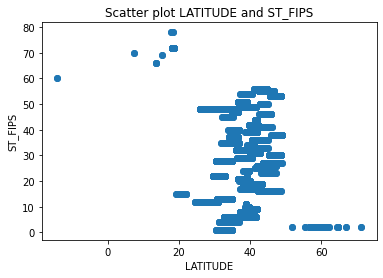

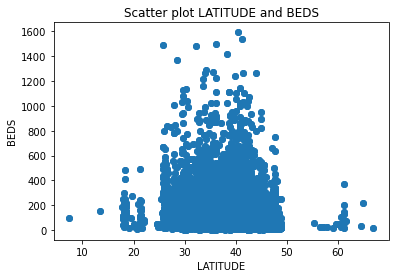

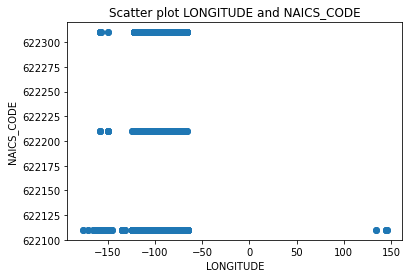

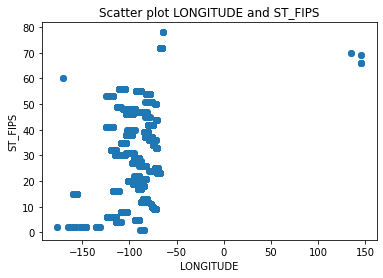

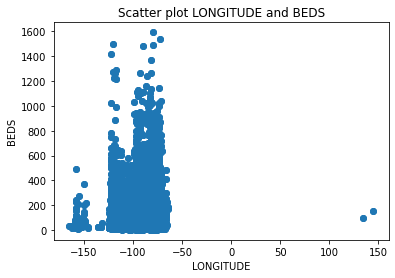

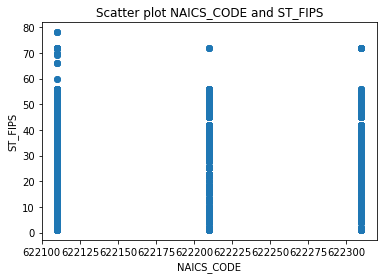

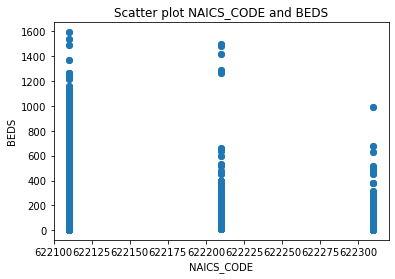

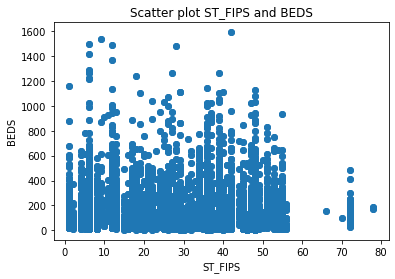

In [10]:
scatter(df)

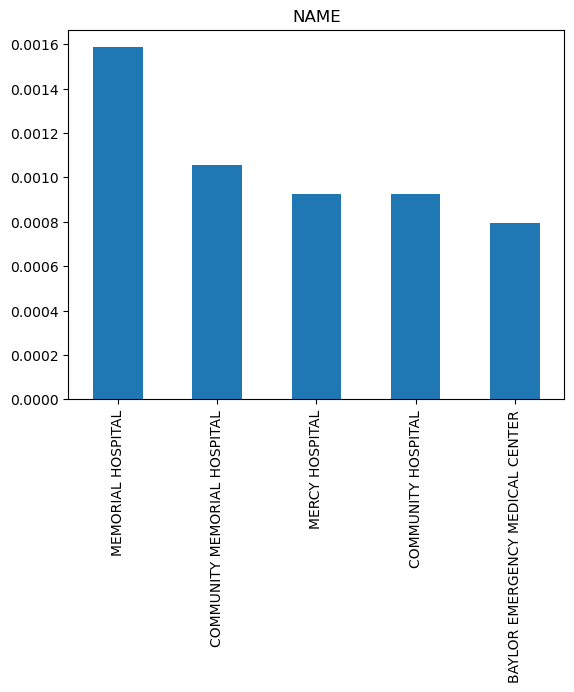

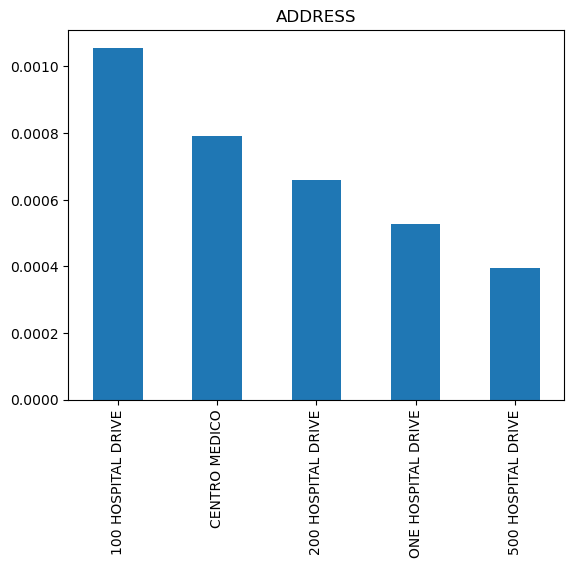

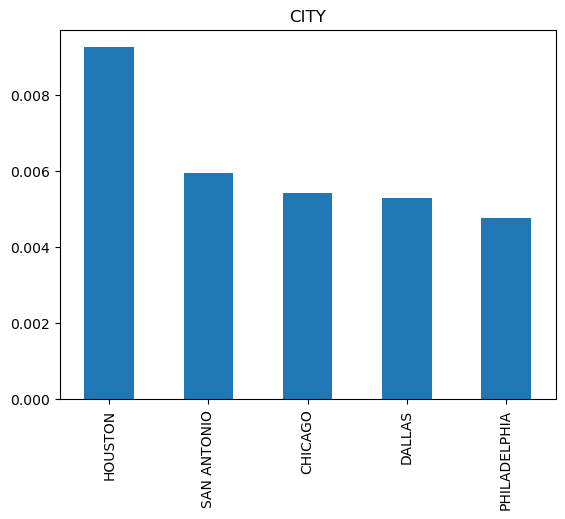

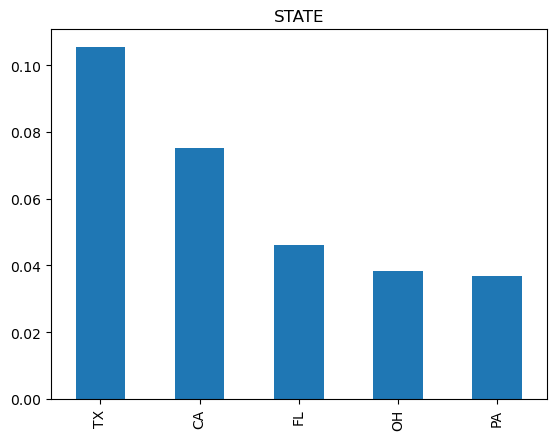

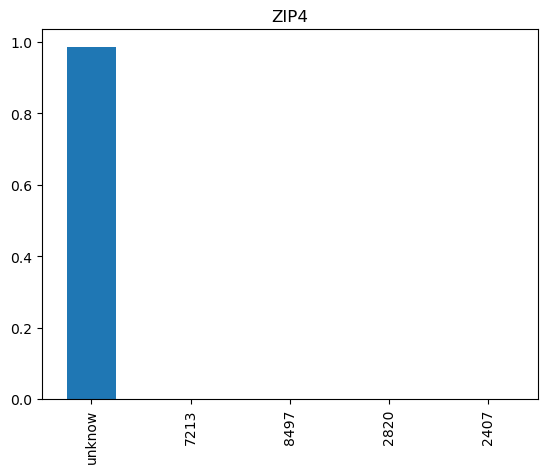

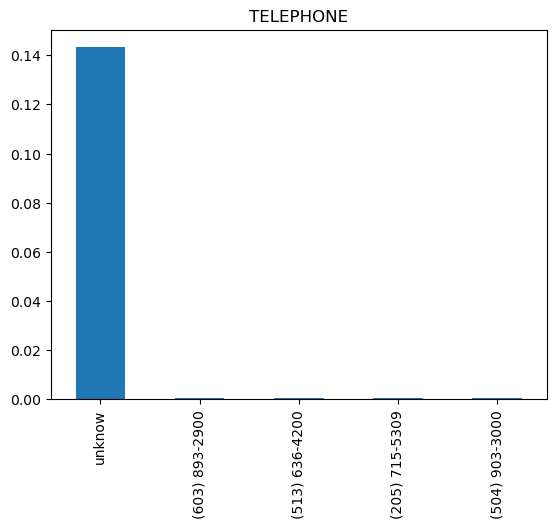

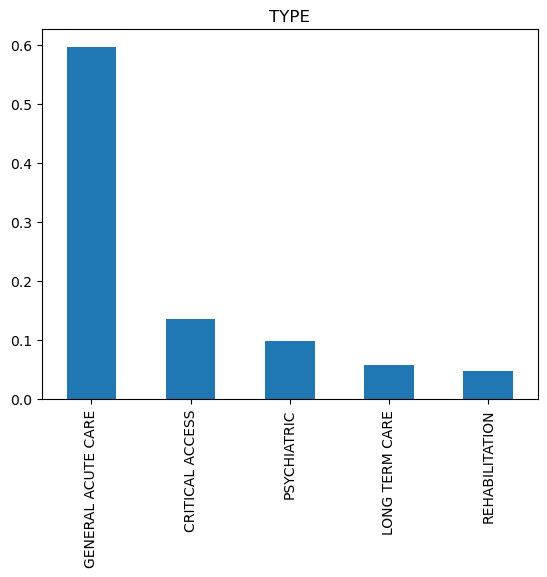

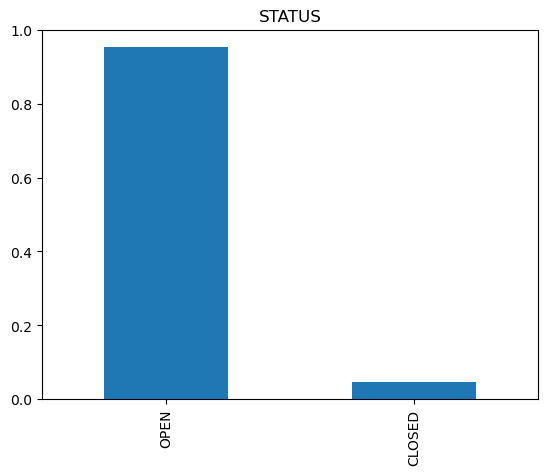

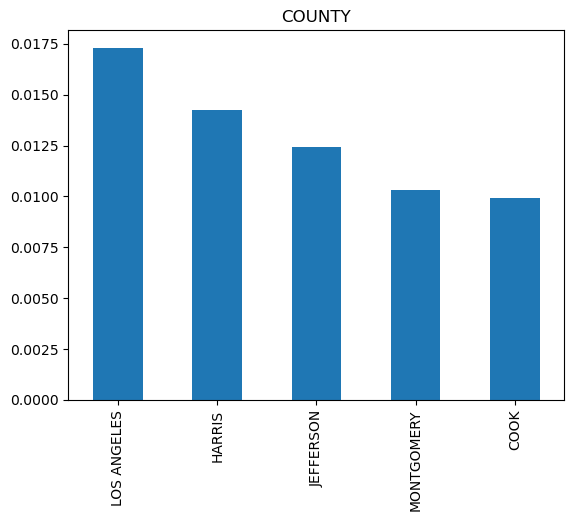

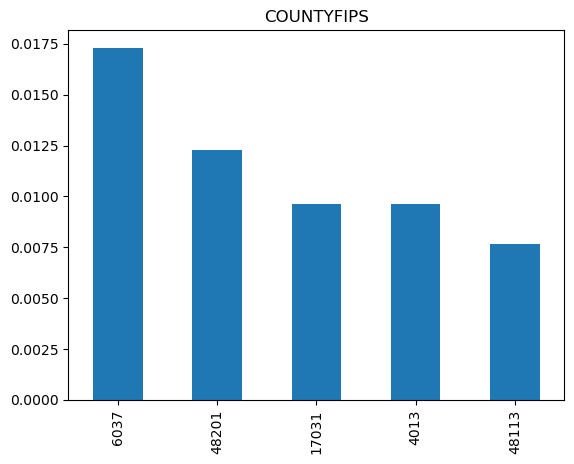

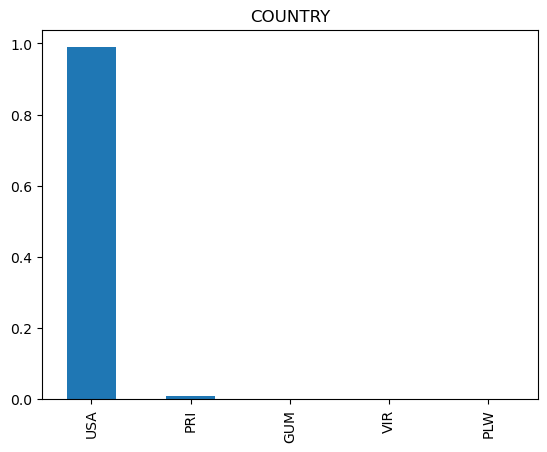

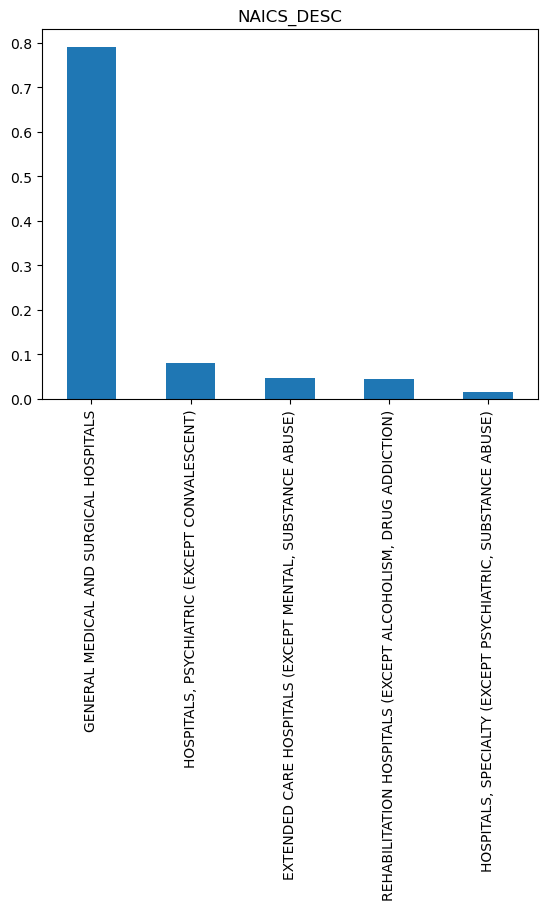

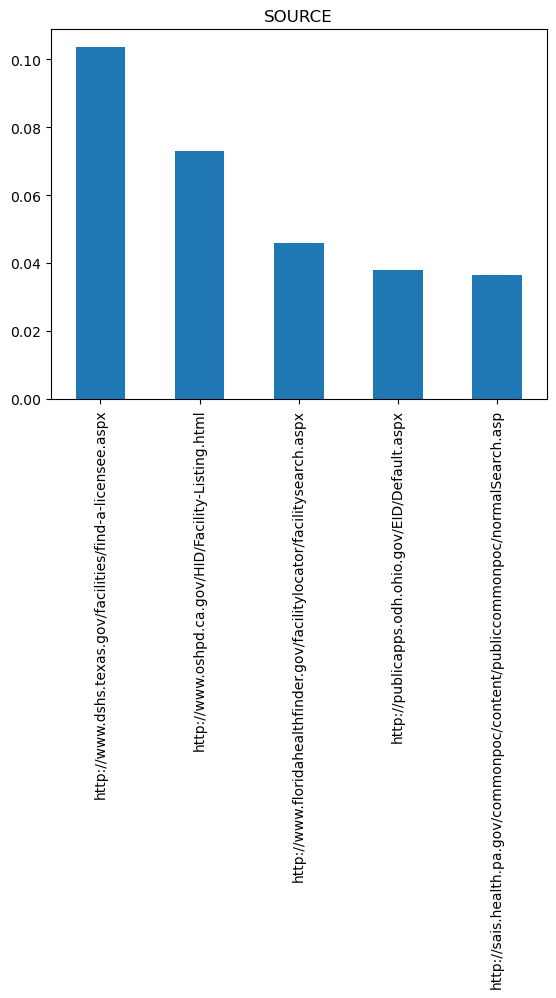

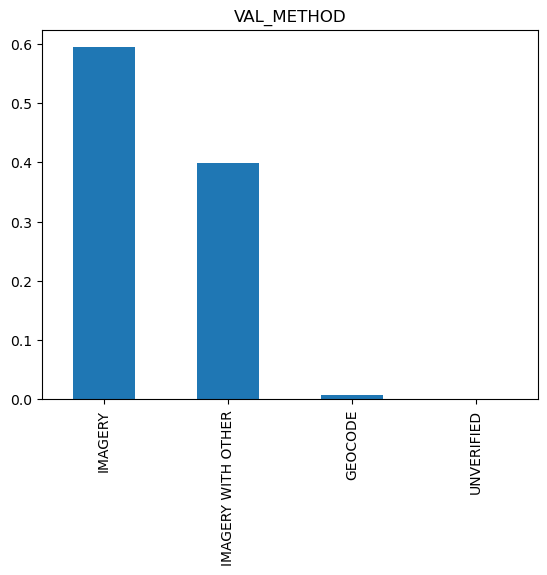

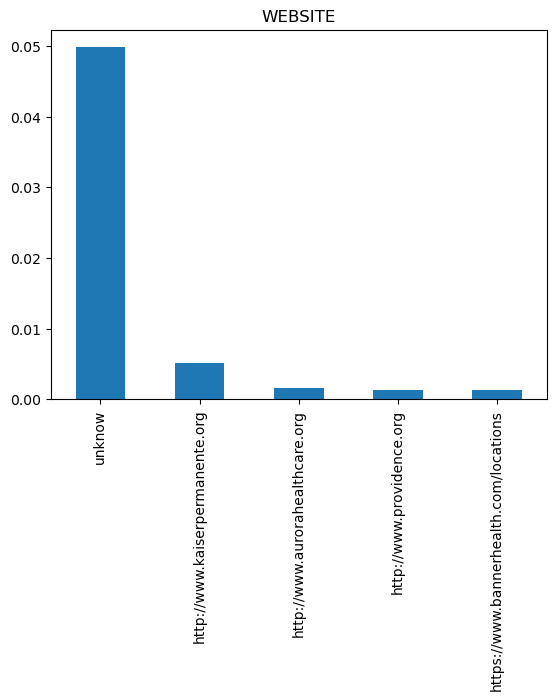

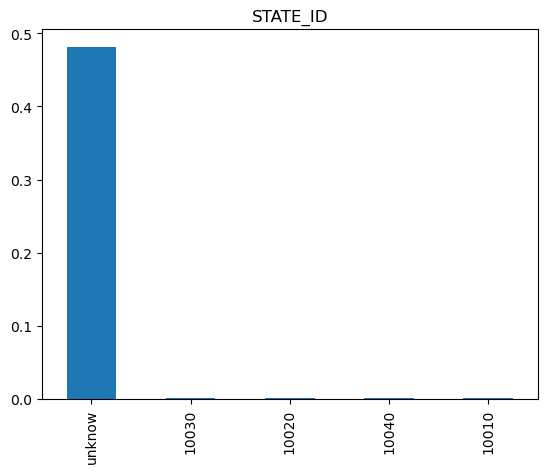

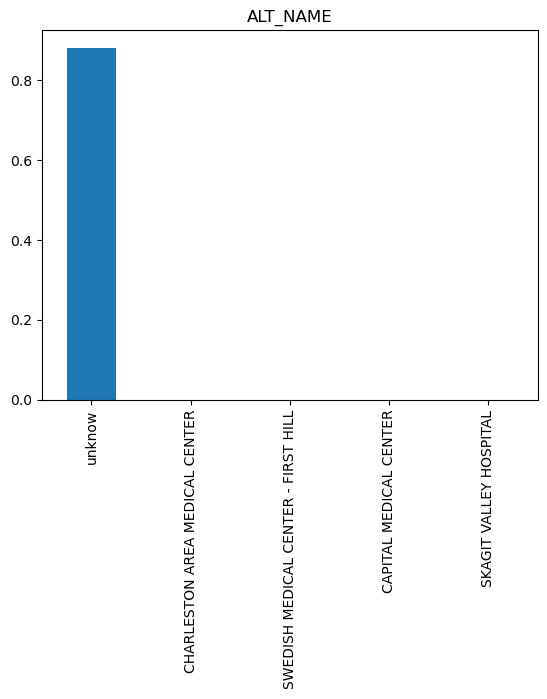

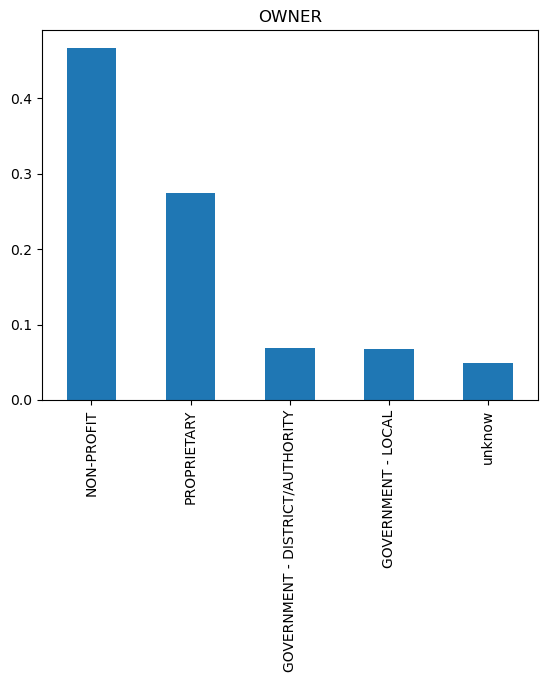

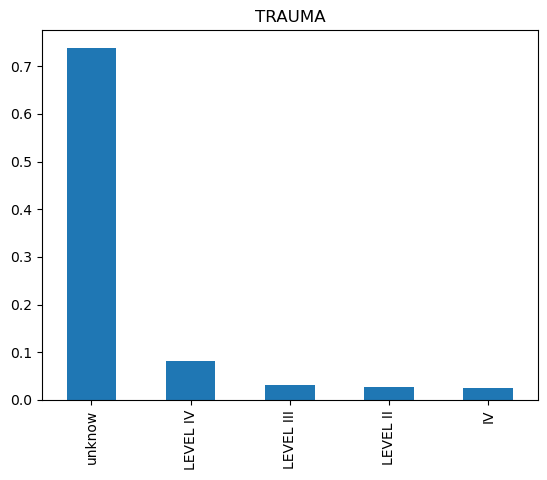

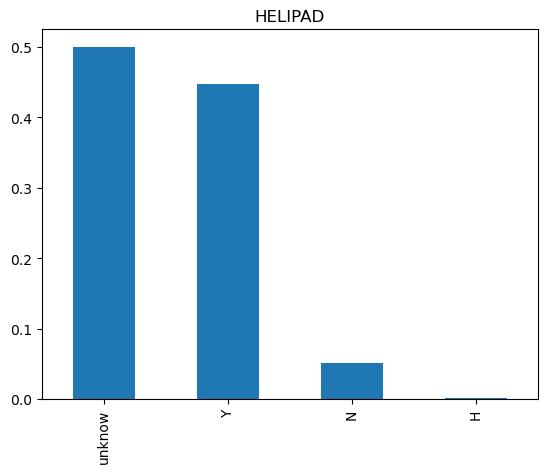

In [11]:
barplot(df,top=5,freq=True)